In [1]:
import pandas as pd
import numpy as np

# Load the data
file_path = '/content/Sanjit_list_2.xlsx'
data = pd.read_excel(file_path)

# Clean and prepare AJCC staging data
ajcc_staging = data.iloc[1, 2:].replace('?', np.nan).astype(float)

# Extract gene expression data and transpose for correct orientation
gene_expressions = data.iloc[4:].set_index('study ID').apply(pd.to_numeric, errors='coerce').transpose()

# Prepare AJCC staging data to align with gene expressions
ajcc_staging_df = ajcc_staging.to_frame(name='AJCC').reset_index().rename(columns={'index': 'Sample'})

# Merge AJCC staging with gene expressions
gene_expressions['Sample'] = gene_expressions.index
merged_data = pd.merge(gene_expressions, ajcc_staging_df, on='Sample', how='inner')

# Set 'Sample' as the index if needed
merged_data.set_index('Sample', inplace=True)

# Drop rows where AJCC is NaN
merged_data_cleaned = merged_data.dropna(subset=['AJCC'])

# Calculate the correlation matrix for AJCC and gene expressions
correlation_matrix = merged_data_cleaned.corr(method='spearman')['AJCC'].sort_values(ascending=False)

# Display the correlation matrix
print(correlation_matrix)


AJCC        1.000000
OID21449    0.774987
OID30688    0.743071
OID30638    0.710882
OID30338    0.710882
              ...   
OID31383   -0.726976
OID21264   -0.727249
OID21258   -0.728886
OID31089   -0.740888
OID20458   -0.758892
Name: AJCC, Length: 2905, dtype: float64


In [2]:
# Export the correlation matrix to a CSV file for easier viewing
correlation_matrix.to_csv('/content/full_correlation_matrix.csv')

# Optionally, display more rows and columns in the console
pd.set_option('display.max_rows', None)  # Be cautious with this if the dataset is very large
pd.set_option('display.max_columns', None)
print(correlation_matrix)


AJCC        1.000000
OID21449    0.774987
OID30688    0.743071
OID30638    0.710882
OID30338    0.710882
OID20704    0.707336
OID30634    0.696970
OID20932    0.695060
OID21084    0.692878
OID30170    0.692878
OID30700    0.687149
OID30639    0.684967
OID20789    0.681148
OID21276    0.679511
OID30580    0.674874
OID30690    0.674874
OID20975    0.674874
OID21414    0.674874
OID30249    0.674874
OID20630    0.672964
OID21027    0.668873
OID20911    0.667509
OID20101    0.661507
OID20231    0.660962
OID20901    0.656870
OID20563    0.655506
OID30344    0.654961
OID20267    0.654415
OID20824    0.653324
OID21115    0.650869
OID30637    0.650869
OID21338    0.642958
OID21131    0.641867
OID20690    0.640230
OID20770    0.639412
OID30591    0.639139
OID20955    0.638866
OID20751    0.636957
OID21310    0.635593
OID21418    0.635593
OID30367    0.633956
OID30380    0.633956
OID20378    0.630137
OID20749    0.625227
OID21048    0.625227
OID30386    0.624954
OID21018    0.624954
OID30697    0

In [3]:
correlation_matrix

AJCC        1.000000
OID21449    0.774987
OID30688    0.743071
OID30638    0.710882
OID30338    0.710882
OID20704    0.707336
OID30634    0.696970
OID20932    0.695060
OID21084    0.692878
OID30170    0.692878
OID30700    0.687149
OID30639    0.684967
OID20789    0.681148
OID21276    0.679511
OID30580    0.674874
OID30690    0.674874
OID20975    0.674874
OID21414    0.674874
OID30249    0.674874
OID20630    0.672964
OID21027    0.668873
OID20911    0.667509
OID20101    0.661507
OID20231    0.660962
OID20901    0.656870
OID20563    0.655506
OID30344    0.654961
OID20267    0.654415
OID20824    0.653324
OID21115    0.650869
OID30637    0.650869
OID21338    0.642958
OID21131    0.641867
OID20690    0.640230
OID20770    0.639412
OID30591    0.639139
OID20955    0.638866
OID20751    0.636957
OID21310    0.635593
OID21418    0.635593
OID30367    0.633956
OID30380    0.633956
OID20378    0.630137
OID20749    0.625227
OID21048    0.625227
OID30386    0.624954
OID21018    0.624954
OID30697    0

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Sanjit_list_2.xlsx'
data = pd.read_excel(file_path)
gene_expressions = data.iloc[4:].set_index('study ID').apply(pd.to_numeric, errors='coerce').transpose()

# Check for Na


In [5]:
# Assuming the numeric gene expression data starts from row 4 and 'study ID' is the row containing gene names
gene_expressions = data.iloc[4:, 2:].apply(pd.to_numeric, errors='coerce')
gene_expressions.index = data.iloc[4:, 1]  # Assuming column 1 has gene identifiers
gene_expressions.columns = data.iloc[3, 2:]  # Assuming row 3 contains sample identifiers

# Verify the conversion and view statistics
print(gene_expressions.info())
print(gene_expressions.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, RTKN2 to MIA
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2904 non-null   float64
 1   N       2904 non-null   float64
 2   N       2904 non-null   float64
 3   Y       2904 non-null   float64
 4   Y       2904 non-null   float64
 5   Y       2904 non-null   float64
 6   N       2904 non-null   float64
 7   N       2904 non-null   float64
 8   N       2904 non-null   float64
 9   N       2904 non-null   float64
 10  N       2904 non-null   float64
 11  N       2904 non-null   float64
 12  N       2904 non-null   float64
 13  Y       2904 non-null   float64
 14  N       2904 non-null   float64
 15  N       2904 non-null   float64
 16  N       2904 non-null   float64
 17  N       2904 non-null   float64
 18  N       2904 non-null   float64
 19  N       2904 non-null   float64
 20  N       2904 non-null   float64
 21  N       2904 non-null   float64
 22  Y 

In [19]:
import pandas as pd

# Load the data
file_path = '/content/Sanjit_list_2.xlsx'
data = pd.read_excel(file_path)

# Print the first 10 rows and the first 7 columns to inspect the data
print(data.iloc[:10, :7])

# Print the data types of the first 10 columns to understand what types of data are being read
print(data.dtypes[:10])


   study ID study ID.1 USC-025 pre USC-027 pre USC-028 pre USC-030 pre  \
0       GEP      Group        GEP1        GEP1        GEP1        GEP1   
1      AJCC       AJCC           2           2           2           1   
2       TNM        TNM           2           2           3           1   
3      Enuc       Enuc           N           N           N           Y   
4  OID30049      RTKN2    -3.49605    -1.26425    -3.61895      0.8668   
5  OID30050    DENND2B    -1.08215    -0.15225    -1.64315      0.6762   
6  OID30051      BHMT2     0.22825     0.08095     0.91585      2.7975   
7  OID30052      SNU13    -0.66205     0.44465     0.55705      1.3985   
8  OID30053     THRAP3    -1.95915    -1.26165    -1.11365     -0.5081   
9  OID30054   TRAF3IP2    -1.36345    -2.46465    -1.71575     -0.4373   

  USC-031 pre  
0        GEP1  
1           2  
2           3  
3           Y  
4     -1.9474  
5     -1.0931  
6     -0.7813  
7     -1.5515  
8     -1.6747  
9     -2.9897  
study ID 

Data Types:
 study ID       object
study ID.1     object
USC-025 pre    object
USC-027 pre    object
USC-028 pre    object
USC-030 pre    object
USC-031 pre    object
USC-032 pre    object
USC-033 pre    object
USC-034 pre    object
USC-035 pre    object
USC-039 pre    object
USC-040 pre    object
USC-043 pre    object
USC-045 pre    object
USC-052 pre    object
USC-060 pre    object
USC-061 pre    object
USC-064 pre    object
USC-068 pre    object
USC-071 pre    object
USC-073 pre    object
USC-024 pre    object
USC-026 pre    object
USC-036 pre    object
USC-037 pre    object
USC-047 pre    object
USC-051 pre    object
USC-053 pre    object
USC-055 pre    object
USC-062 pre    object
USC-066 pre    object
dtype: object
Data Preview:
    study ID study ID.1 USC-025 pre USC-027 pre USC-028 pre USC-030 pre  \
0       GEP      Group        GEP1        GEP1        GEP1        GEP1   
1      AJCC       AJCC           2           2           2           1   
2       TNM        TNM          

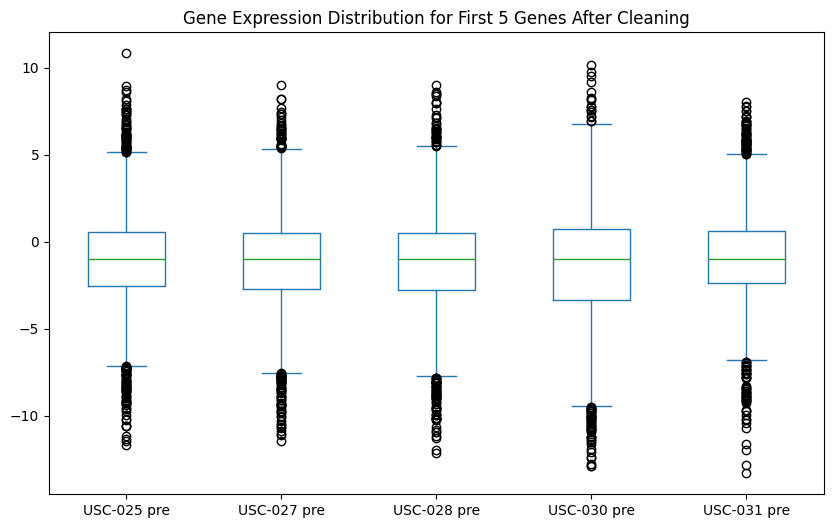

In [6]:
import pandas as pd

# Load the data
file_path = '/content/Sanjit_list_2.xlsx'
data = pd.read_excel(file_path)

# Display the data types and a sample of the data for verification
print("Data Types:\n", data.dtypes)
print("Data Preview:\n", data.head(10))

# Isolate the numeric part of the DataFrame which seems to start from row 4
gene_expressions = data.iloc[4:, 2:]  # Adjust column index if necessary

# Convert all columns to numeric, coercing errors to NaN
gene_expressions = gene_expressions.apply(pd.to_numeric, errors='coerce')

# Check for successful conversion
print("Data Types after conversion:\n", gene_expressions.dtypes)
print("Data Preview after conversion:\n", gene_expressions.head())

# Check if there are any NaNs after conversion
print("NaN values per column:\n", gene_expressions.isna().sum())

# Drop columns still containing NaN values if they exist
gene_expressions = gene_expressions.dropna(axis=1)

# Verify the clean data
print("Clean Data Preview:\n", gene_expressions.head())

# Optionally, plotting the distribution of some genes
import matplotlib.pyplot as plt
gene_expressions.iloc[:, :5].plot(kind='box', figsize=(10, 6))
plt.title('Gene Expression Distribution for First 5 Genes After Cleaning')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


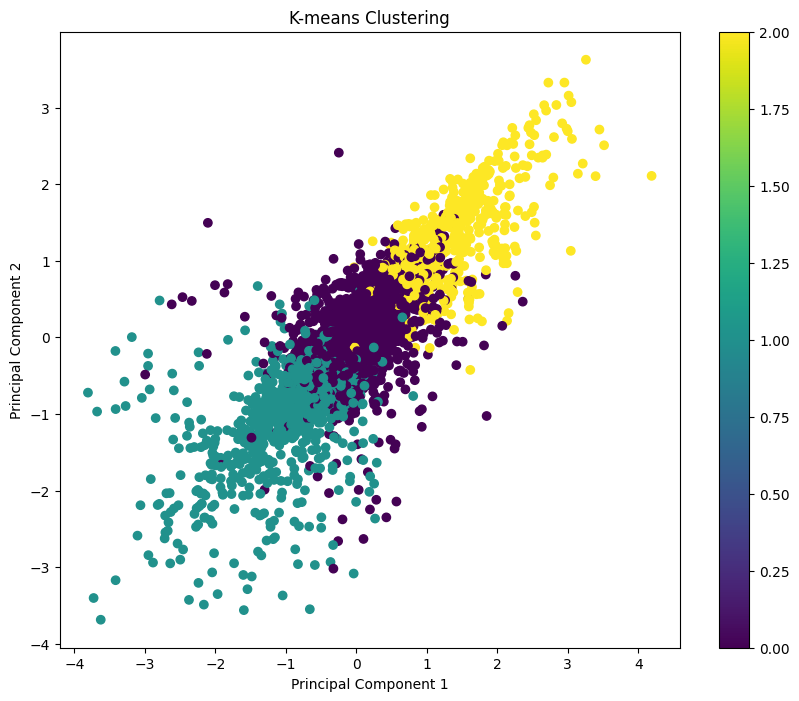

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming gene_expressions is your DataFrame with numeric data
scaler = StandardScaler()
gene_expressions_scaled = scaler.fit_transform(gene_expressions)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters based on your data
kmeans.fit(gene_expressions_scaled)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Attach cluster labels to the original data
gene_expressions['Cluster'] = cluster_labels

# Plot the clusters for the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(gene_expressions_scaled[:, 0], gene_expressions_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Optionally, analyze cluster distribution with AJCC if available
if 'AJCC' in data.columns:
    gene_expressions['AJCC'] = data['AJCC'].iloc[4:].values
    print(gene_expressions.groupby('Cluster')['AJCC'].mean())  # or median, mode, etc.


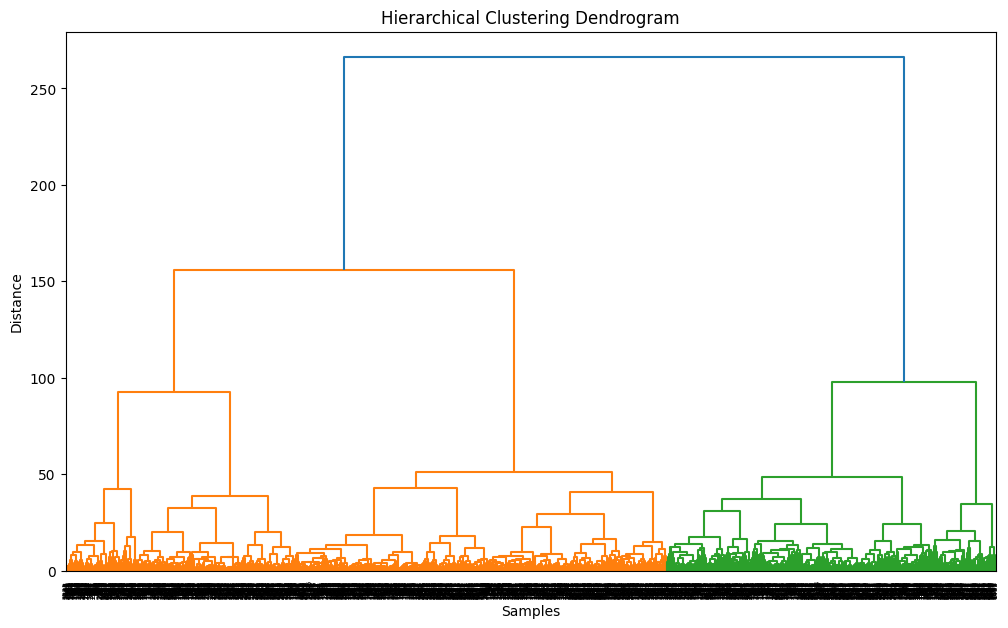

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Apply hierarchical clustering
linked = linkage(gene_expressions_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', labels=gene_expressions.index.array, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
